Saving archive (2).zip to archive (2) (1).zip
First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null  

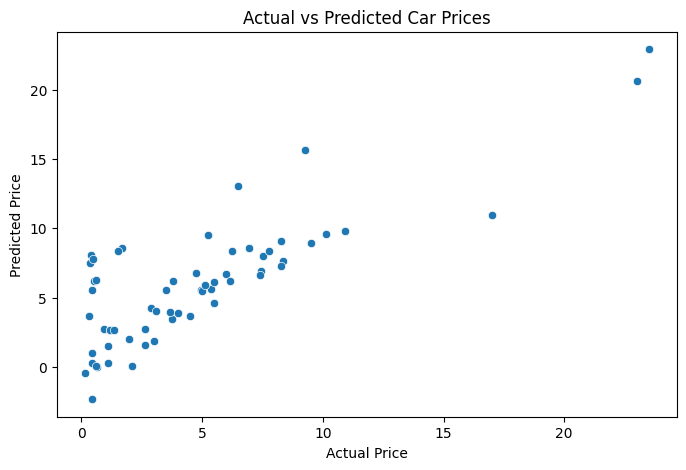

In [3]:
# Car Price Prediction with Machine Learning

import pandas as pd
from google.colab import files
import zipfile
import io
import matplotlib.pyplot as plt

uploaded=files.upload()

for filename in uploaded.keys():
  if filename.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
      zip_ref.extractall('.')
      for file_info in zip_ref.infolist():
        if file_info.filename.endswith('.csv'):
          df = pd.read_csv(file_info.filename)
          break
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("car data.csv")
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample predictions:")
print(comparison.head())

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()